In [2]:
import tensorflow as tf 
import numpy as np 
import math
import os 
from PIL import Image  
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing 
from scipy.stats import skew, boxcox
 
 

# Outlier Pursuit Model with L1 norm

In [9]:
lamlist1=[0.03,0.04,0.045,0.07,0.10,0.13,0.15] 
AUCL1=np.array([0.5498750306297475,0.6140896839010046,0.597922077922078,0.5792697868169566,0.5525410438617986,0.5157069345748592,0.49972555746140657
])
lamlist2=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.10,0.13,0.15] 
PRL1=np.array([0.05844673241324096,0.06329132119853635,0.0871634627275134,0.0887288162498608,0.08666823053944786,0.078533422704078,0.07541386484802959,0.06840715084889193,0.060539232961966366,0.059107471090843286])

AUCL10=np.max([AUCL1,1-AUCL1],axis=0) 
print(AUCL10)

[0.54987503 0.61408968 0.59792208 0.57926979 0.55254104 0.51570693
 0.50027444]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


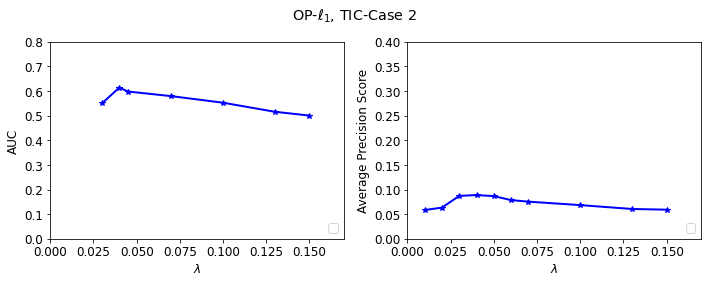

In [10]:
#title='Logistic Regression, TIC \n'
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
#axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.title('AUC v.s. Ratio of Outliers')
axs[0].plot(lamlist1,AUCL10, '*-', color='b', lw=2,label='')#,label='{}ROC curve (area)'
axs[1].plot(lamlist2,PRL1, '*-', color='b', lw=2,label='')#,label='{}PRC curve (area)'
x=np.array([0.17,0.17])
y=np.array([0.8,0.4])
s=0
for ax, labels in zip(axs, (('$\lambda$', 'AUC'), ('$\lambda$', 'Average Precision Score'))):
    ax.set_xlim([0.0, x[s]])
    ax.set_ylim([0.0, y[s]])
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.legend(loc="lower right")
    s=s+1 
plt.suptitle('OP-$\ell_1$, TIC-Case 2')
#plt.title('AUC v.s. Ratio of Outliers')
plt.tight_layout(rect=(0.0, 0.0, 1.0, 0.92))
plt.savefig('TIC2RatioL1.jpg')
plt.show()

# Outlier Pursuit Model with Lp norm

In [11]:
lamlist1=[0.01,0.03,0.04,0.07,0.10,0.13,0.15] # 
plist1=[0.7,0.75,0.8,0.85,0.9,0.95,0.98] 
AUCLp=np.array([0.5243935309973047,0.5243861798578779,0.5243861798578779,0.5243812790982603,0.5244180347953933,0.5243984317569224,0.524442538593482,0.5244327370742465
,0.5244106836559667,0.5606125949522176,0.5710316098995344,0.5764322469982848,0.5668365596667483,0.5567998039696153
,0.572173486890468,0.5985297721146777,0.6112472433227151,0.6060328350894388,0.5985689781916197,0.6011859838274932,0.6081058564077433
,0.5219554030874786,0.5288262680715511,0.5414898309237932,0.5579514824797844,0.5647488360695908,0.5740700808625337
,0.5770938495466797,0.5216515559911786,0.5232590051457975,0.5224846851261945,0.47612839990198474,0.520700808625337
,0.539299191374663,0.5473511394266111,0.4980494976721392,0.4949424160744915,0.4861872090173976,0.5250330801274198
,0.5199950992403822,0.4907228620436167,0.5057730948296986,0.5028081352609655,0.4985885812300906
,0.4970007351139426,0.4861921097770153,0.5016907620681206,0.4996986032835089,0.48836559666748347])
AUCLp0=np.max([AUCLp,1-AUCLp],axis=0)
print(AUCLp0)

[0.52439353 0.52438618 0.52438618 0.52438128 0.52441803 0.52439843
 0.52444254 0.52443274 0.52441068 0.56061259 0.57103161 0.57643225
 0.56683656 0.5567998  0.57217349 0.59852977 0.61124724 0.60603284
 0.59856898 0.60118598 0.60810586 0.5219554  0.52882627 0.54148983
 0.55795148 0.56474884 0.57407008 0.57709385 0.52165156 0.52325901
 0.52248469 0.5238716  0.52070081 0.53929919 0.54735114 0.5019505
 0.50505758 0.51381279 0.52503308 0.5199951  0.50927714 0.50577309
 0.50280814 0.50141142 0.50299926 0.51380789 0.50169076 0.5003014
 0.5116344 ]


In [12]:
ss1=lamlist1.copy()
data=[]
s=0
for lam in lamlist1:
    data0=[]
    for p in plist1:
        data0.append(AUCLp0[s])
        s=s+1
    data.append(np.array(data0))
print(data)
fig1=[]
for ind in np.argsort(ss1):
    fig1.append(data[ind])
print(fig1)

[array([0.52439353, 0.52438618, 0.52438618, 0.52438128, 0.52441803,
       0.52439843, 0.52444254]), array([0.52443274, 0.52441068, 0.56061259, 0.57103161, 0.57643225,
       0.56683656, 0.5567998 ]), array([0.57217349, 0.59852977, 0.61124724, 0.60603284, 0.59856898,
       0.60118598, 0.60810586]), array([0.5219554 , 0.52882627, 0.54148983, 0.55795148, 0.56474884,
       0.57407008, 0.57709385]), array([0.52165156, 0.52325901, 0.52248469, 0.5238716 , 0.52070081,
       0.53929919, 0.54735114]), array([0.5019505 , 0.50505758, 0.51381279, 0.52503308, 0.5199951 ,
       0.50927714, 0.50577309]), array([0.50280814, 0.50141142, 0.50299926, 0.51380789, 0.50169076,
       0.5003014 , 0.5116344 ])]
[array([0.52439353, 0.52438618, 0.52438618, 0.52438128, 0.52441803,
       0.52439843, 0.52444254]), array([0.52443274, 0.52441068, 0.56061259, 0.57103161, 0.57643225,
       0.56683656, 0.5567998 ]), array([0.57217349, 0.59852977, 0.61124724, 0.60603284, 0.59856898,
       0.60118598, 0.60810586])

In [13]:
lamlist2=[0.01,0.03,0.04,0.07,0.10,0.13,0.15] # 
plist2=[0.7,0.75,0.8,0.85,0.9,0.95,0.98] 

PRLp=np.array([0.06328912206575973,0.06330027541450434,0.06329558897952807,0.06329385475187871,0.06330851382781727,0.06329214644909949,0.0633232051220122
,0.06329818842033651,0.06330949762138127,0.06560817225748636,0.06648947938751479,0.06733959030308014,0.0662434145849594,0.06574595064446982
,0.06656007484036194,0.07197009258030072,0.08089235846803902,0.08913997593075532,0.09220762894107126,0.09153785175407504
,0.0907834577391226,0.06380314060888888,0.0646408376835857,0.06614991953494842,0.0678478135069434,0.06996848134627676,0.07277337713056445
,0.07423886457655998,0.061988435693507274,0.061584801752603224,0.0596204606102725,0.05541227565778797,0.062063444898817606
,0.06622075548655511,0.0673864051707718,0.05971035164265626,0.05974752053551104,0.05994279893900928,0.06219497695090875
,0.0603461882235346,0.057411400885519645,0.058811481208426955,0.06014417896171821,0.05986678432277846,0.05983918607890199
,0.06011356920932752,0.06121587933874083,0.06068984078453947,0.05864495884114914])

In [14]:
ss2=lamlist2.copy()
data=[]
s=0
for lam in lamlist2:
    data0=[]
    for p in plist2:
        data0.append(PRLp[s])
        s=s+1
    data.append(np.array(data0))
print(data)
fig2=[]
for ind in np.argsort(ss2):
    fig2.append(data[ind])
print(fig2)

[array([0.06328912, 0.06330028, 0.06329559, 0.06329385, 0.06330851,
       0.06329215, 0.06332321]), array([0.06329819, 0.0633095 , 0.06560817, 0.06648948, 0.06733959,
       0.06624341, 0.06574595]), array([0.06656007, 0.07197009, 0.08089236, 0.08913998, 0.09220763,
       0.09153785, 0.09078346]), array([0.06380314, 0.06464084, 0.06614992, 0.06784781, 0.06996848,
       0.07277338, 0.07423886]), array([0.06198844, 0.0615848 , 0.05962046, 0.05541228, 0.06206344,
       0.06622076, 0.06738641]), array([0.05971035, 0.05974752, 0.0599428 , 0.06219498, 0.06034619,
       0.0574114 , 0.05881148]), array([0.06014418, 0.05986678, 0.05983919, 0.06011357, 0.06121588,
       0.06068984, 0.05864496])]
[array([0.06328912, 0.06330028, 0.06329559, 0.06329385, 0.06330851,
       0.06329215, 0.06332321]), array([0.06329819, 0.0633095 , 0.06560817, 0.06648948, 0.06733959,
       0.06624341, 0.06574595]), array([0.06656007, 0.07197009, 0.08089236, 0.08913998, 0.09220763,
       0.09153785, 0.09078346])

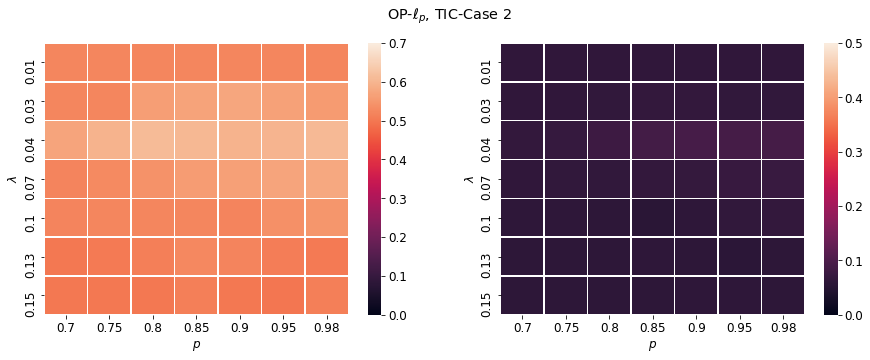

In [16]:
import numpy as np; np.random.seed(0)
import seaborn as sns

# uniform_data = np.random.rand(10, 12)    
# uniform_data2 = np.random.rand(100, 120)

figs, ax =plt.subplots(1,2,figsize=(15, 5))

ax1 = sns.heatmap(fig1, linewidth=0.5, xticklabels=plist1, yticklabels=np.sort(ss1), ax=ax[0],vmin=0, vmax=0.7)
ax1.set(xlabel='$p$', ylabel='$\lambda$')

ax2 = sns.heatmap(fig2, linewidth=0.5, xticklabels=plist2, yticklabels=np.sort(ss2), ax=ax[1],vmin=0, vmax=0.5)
ax2.set(xlabel='$p$', ylabel='$\lambda$')
plt.suptitle('OP-$\ell_p$, TIC-Case 2')
# sns.heatmap(uniform_data, ax=ax[0])
# sns.heatmap(uniform_data2, ax=ax[1])
plt.savefig('TIC2RatioLp.jpg')
plt.show()

# Outlier Pursuit Model with ETP

In [17]:
lamlist1=[0.02,0.04,0.06,0.08,0.1,0.13] 
plist1=[0.0000001,0.00001,0.001,0.1]

AUCETP=np.array([0.5243886302376868,0.5243763783386425,0.5244008821367312,0.5243567753001714,0.6140749816221514,0.6129772114677775,0.5735996079392306
,0.5244253859348198,0.5824895858858123,0.5822151433472188,0.570340602793433,0.5129772114677774,0.5723646165155599,0.5721048762558196
,0.5611614800294046,0.5044694927713795,0.552531242342563,0.55236461651556,0.5389267336437148,0.5566380789022298,0.5157118353344768
,0.5155550110267091,0.5002352364616516,0.4871918647390346])

AUCETP0=np.max([AUCETP,1-AUCETP],axis=0)
print(AUCETP0)

[0.52438863 0.52437638 0.52440088 0.52435678 0.61407498 0.61297721
 0.57359961 0.52442539 0.58248959 0.58221514 0.5703406  0.51297721
 0.57236462 0.57210488 0.56116148 0.50446949 0.55253124 0.55236462
 0.53892673 0.55663808 0.51571184 0.51555501 0.50023524 0.51280814]


In [18]:
ss1=lamlist1.copy()
data=[]
s=0
for lam in lamlist1:
    data0=[]
    for p in plist1:
        data0.append(AUCETP0[s])
        s=s+1
    data.append(np.array(data0))
print(data)
fig1=[]
for ind in np.argsort(ss1):
    fig1.append(data[ind])
print(fig1)

[array([0.52438863, 0.52437638, 0.52440088, 0.52435678]), array([0.61407498, 0.61297721, 0.57359961, 0.52442539]), array([0.58248959, 0.58221514, 0.5703406 , 0.51297721]), array([0.57236462, 0.57210488, 0.56116148, 0.50446949]), array([0.55253124, 0.55236462, 0.53892673, 0.55663808]), array([0.51571184, 0.51555501, 0.50023524, 0.51280814])]
[array([0.52438863, 0.52437638, 0.52440088, 0.52435678]), array([0.61407498, 0.61297721, 0.57359961, 0.52442539]), array([0.58248959, 0.58221514, 0.5703406 , 0.51297721]), array([0.57236462, 0.57210488, 0.56116148, 0.50446949]), array([0.55253124, 0.55236462, 0.53892673, 0.55663808]), array([0.51571184, 0.51555501, 0.50023524, 0.51280814])]


In [19]:
lamlist2=[0.023,0.025,0.028,0.03,0.033,0.035] # 
plist2=[0.0000001,0.00001,0.001,0.1] 

PRETP=np.array([0.0633055731719134,0.06331900715603364,0.06329073609559671,0.06328173285444123,0.06331009207617616,0.06330424585347535,0.06330583159301828
,0.06330763710090821,0.06393429643839368,0.06398703544258025,0.09746742665343307,0.06329995149498954,0.06511092073222258,0.06506778201576653
,0.10081709302014988,0.06328601299629405,0.06810335795257096,0.06844659059538698,0.10104075152510245,0.06328459052600077,0.07364018068157671
,0.07437634059418657,0.1011532489378958,0.06330026148272583])

In [20]:
ss2=lamlist2.copy()
data=[]
s=0
for lam in lamlist2:
    data0=[]
    for p in plist2:
        data0.append(PRETP[s])
        s=s+1
    data.append(np.array(data0))
print(data)
fig2=[]
for ind in np.argsort(ss2):
    fig2.append(data[ind])
print(fig2)

[array([0.06330557, 0.06331901, 0.06329074, 0.06328173]), array([0.06331009, 0.06330425, 0.06330583, 0.06330764]), array([0.0639343 , 0.06398704, 0.09746743, 0.06329995]), array([0.06511092, 0.06506778, 0.10081709, 0.06328601]), array([0.06810336, 0.06844659, 0.10104075, 0.06328459]), array([0.07364018, 0.07437634, 0.10115325, 0.06330026])]
[array([0.06330557, 0.06331901, 0.06329074, 0.06328173]), array([0.06331009, 0.06330425, 0.06330583, 0.06330764]), array([0.0639343 , 0.06398704, 0.09746743, 0.06329995]), array([0.06511092, 0.06506778, 0.10081709, 0.06328601]), array([0.06810336, 0.06844659, 0.10104075, 0.06328459]), array([0.07364018, 0.07437634, 0.10115325, 0.06330026])]


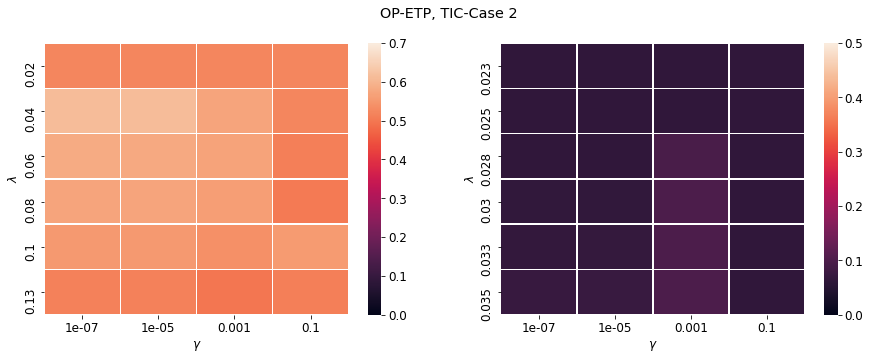

In [21]:
import numpy as np; np.random.seed(0)
import seaborn as sns

# uniform_data = np.random.rand(10, 12)    
# uniform_data2 = np.random.rand(100, 120)

figs, ax =plt.subplots(1,2,figsize=(15, 5))

ax1 = sns.heatmap(fig1, linewidth=0.5, xticklabels=plist1, yticklabels=np.sort(ss1), ax=ax[0],vmin=0, vmax=0.7)
ax1.set(xlabel='$\gamma$', ylabel='$\lambda$') 

ax2 = sns.heatmap(fig2, linewidth=0.5, xticklabels=plist2, yticklabels=np.sort(ss2), ax=ax[1],vmin=0, vmax=0.5)
ax2.set(xlabel='$\gamma$', ylabel='$\lambda$') 
plt.suptitle('OP-ETP, TIC-Case 2')
# sns.heatmap(uniform_data, ax=ax[0])
# sns.heatmap(uniform_data2, ax=ax[1])
plt.savefig('TIC2RatioETP.jpg')
plt.show()